# Busy City


In [1]:
from utils import *
from training import *
from policies import *
from envs import *

## The Environement
![The map](figures/busy_city.png)

Each step induces a reward of -1. Red roads have a 1/10 chance of inducing a reward of -16 instead. Reaching the objective cell induces a reward of +10
## Training with CPT-PG with a risk-averse $w$

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]C:\Users\iclr25\Desktop\code_restructure\CPT-RL\policies.py:32: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(self.alpha*F.tanh(x/self.alpha))
100%|████████████████████████████████████████████████████████████████████████████████| 1/1 [1:12:35<00:00, 4355.30s/it]


  | 0 | 1 | 2 | 3 | 
--------------------
0 | → | → | ? | ↓ | 
--------------------
1 | ↑ | ? | → | ↓ | 
--------------------
2 | ↑ | ↑ | ? | G | 
--------------------
3 | ↑ | ↑ | ↑ | ? | 
--------------------


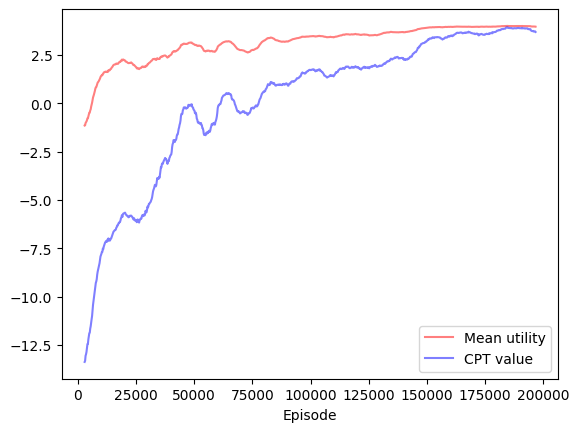

In [2]:
outputs_pretraining = []
LL, LLu,LLx,LLcpt = [],[],[],[]
n_tries = 1

for i in trange(n_tries):
    policy = MLP_thin()
    optimizer = optim.Adam(policy.parameters(), lr=0.01) # wp_three_segments

    policy.setAlpha(7)
    elt_pretrain = train(policy, optimizer,env=BusyCity(random_start=True), num_episodes=100,use_dict=True,changing_entropy=True, entropy_max=5,entropy_min = 3, phi_baseline=True, batch_size= 200, draw_policy=False,adaptive_baseline=False,random_start=True,log_interval=1, changing_alpha=False,return_best=False, w=None)

    outputs_pretraining.append(elt_pretrain)
    L,Lu,Lx,Lcpt,_ = train(policy, optimizer,env=BusyCity(random_start=False), num_episodes=1000,use_dict=True,changing_entropy=True, entropy_max=3,entropy_min = 0, phi_baseline=True, batch_size= 200, draw_policy=False,adaptive_baseline=False,random_start=True,log_interval=1, changing_alpha=False,return_best=False, w=wp_new)

    LL.append(L)
    LLu.append(Lu)
    LLx.append(Lx)
    LLcpt.append(Lcpt)
for a,b,c,i in zip(LLx,LLu,LLcpt,range(len(LLx))):
    plt.plot(smooth(a,30),smooth(b,30),alpha=0.5,color="red",label="Mean utility" if i==0 else None)
    plt.plot(smooth(a,30),smooth(c,30),alpha=0.5,color="blue",label="CPT value"if i==0 else None)
    plt.xlabel("Episode")
    plt.legend()

BusyCity().display(policy)

The code above only plots the CPT training phase and not the pre-training. The number of tries plotted can be adjusted at the beginning.